In [44]:
# Created on Sun Aug 13 13:14:06 2023

# @author: katelynsmith

import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
#plt.style.use(['no-latex']) 
#from emcee import MASER

import astropy.units as u
from astropy.timeseries import BoxLeastSquares

import scipy.signal as sps

import maser as ms
import starspot as ss
import astrobase as ab
#from astrobase import periodbase


from tqdm import tqdm 
# Setting directory

ddir = '/Users/katelynsmith/Desktop/Capstone/'

import warnings
warnings.filterwarnings("ignore")

import latex

In [45]:
# Defining variables 

M_s = 0.5 # Star mass (solar masses) #### REFERENCE (PAPER 6 on one note) #####
R_s = 0.75 # Star radius (solar radii) ####  REFERENCE (PAPER 6 on one note) ####
P_s = 4.86 # Star rotation period (days) ####  REFERENCE (PAPER 6 on one note) ####
i_s = 90 # Star inclination of the rotation axis relative to the line of sight (degrees) ####  ACCORDING TO MEETING WITH BEN ####
B_s = 430 # Star dipole field strength at the magnetic poles (Gauss) #### https://arxiv.org/pdf/2304.09642.pdf #### 
beta = 20 # Star magnetic obliquity (degrees) #### ACCORDING TO MEETING WITH BEN ####
phi_s0 = 0.2 # Star rotation phase at times = 0 (0 – 1) <<<<<< LEFT AS IS
a = 10 # Planet orbital distance (stellar radii) #### REFERENCE (PAPER 6 on one note) ####
i_p = 89.18 # Planet inclination of the orbital axis relative to the line of sight (degrees) #### REFERENCE (PAPER 7 on one note) #### 
lam = 0 # Planet projected spin-orbit angle (degrees) #### ranging from -15 to 18 degrees 
#REFERENCE Spin-orbit alignment and magnetic activity in the young planetary system AU Mic⋆ ####
P_p = 8.4630351 # AU Mic b period in days
phi_p0 = 0.6 # Planet orbital phase at times = 0 (0 – 1) <<<<< LEFT AS IS
f = 10 # Emission observing frequency (MHz) #### - MAY INCREASE TO 3 GHz REFERENCE (PAPER 6 on one note) ####
alpha = 75 # Emission cone opening angle (degrees) <<<<< LEFT THESE AS IS - BASED ON KAVANAGH 2023
dalpha = 5 # Emission cone thickness (degrees) <<<<< LEFT THESE AS IS - BASED ON KAVANAGH 2023


In [46]:
times = np.linspace(0, 50, 1000) # Array of observation times to compute (days)

# Call the function
vis_N, vis_S = ms.maser(M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)


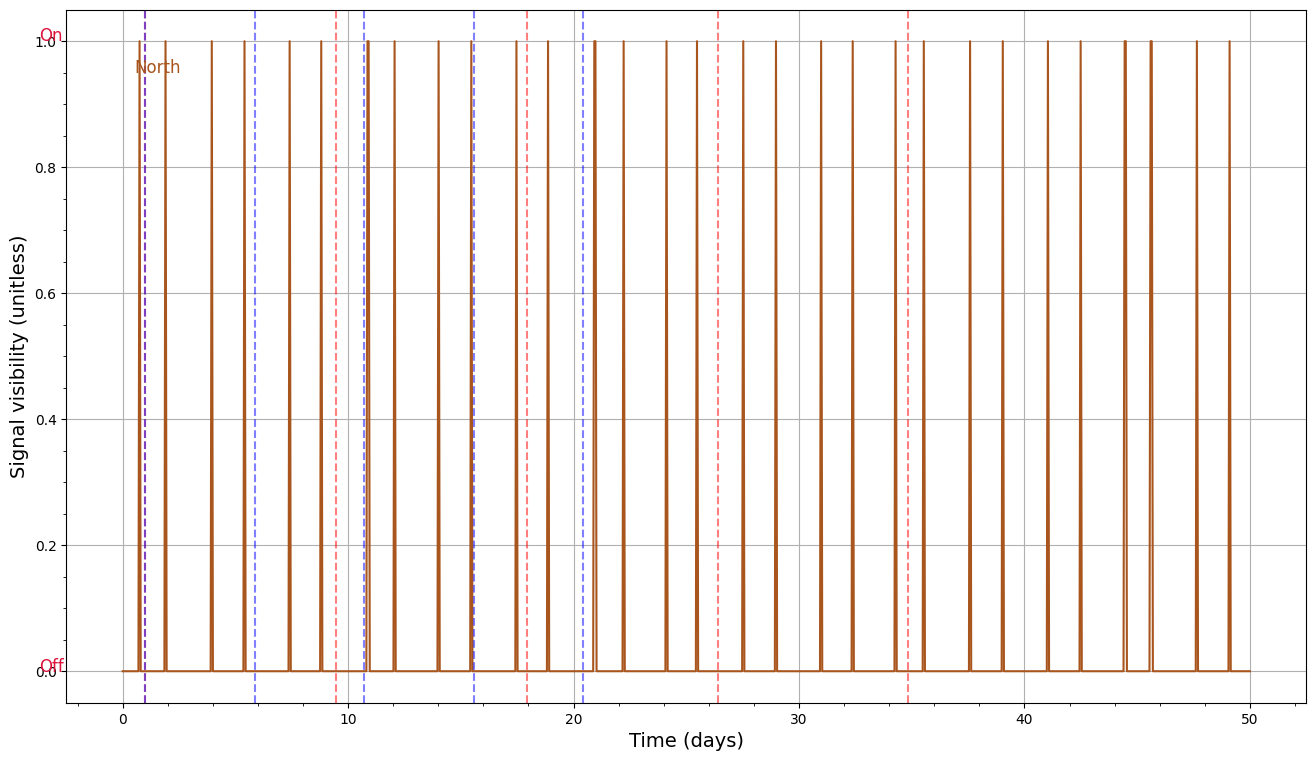

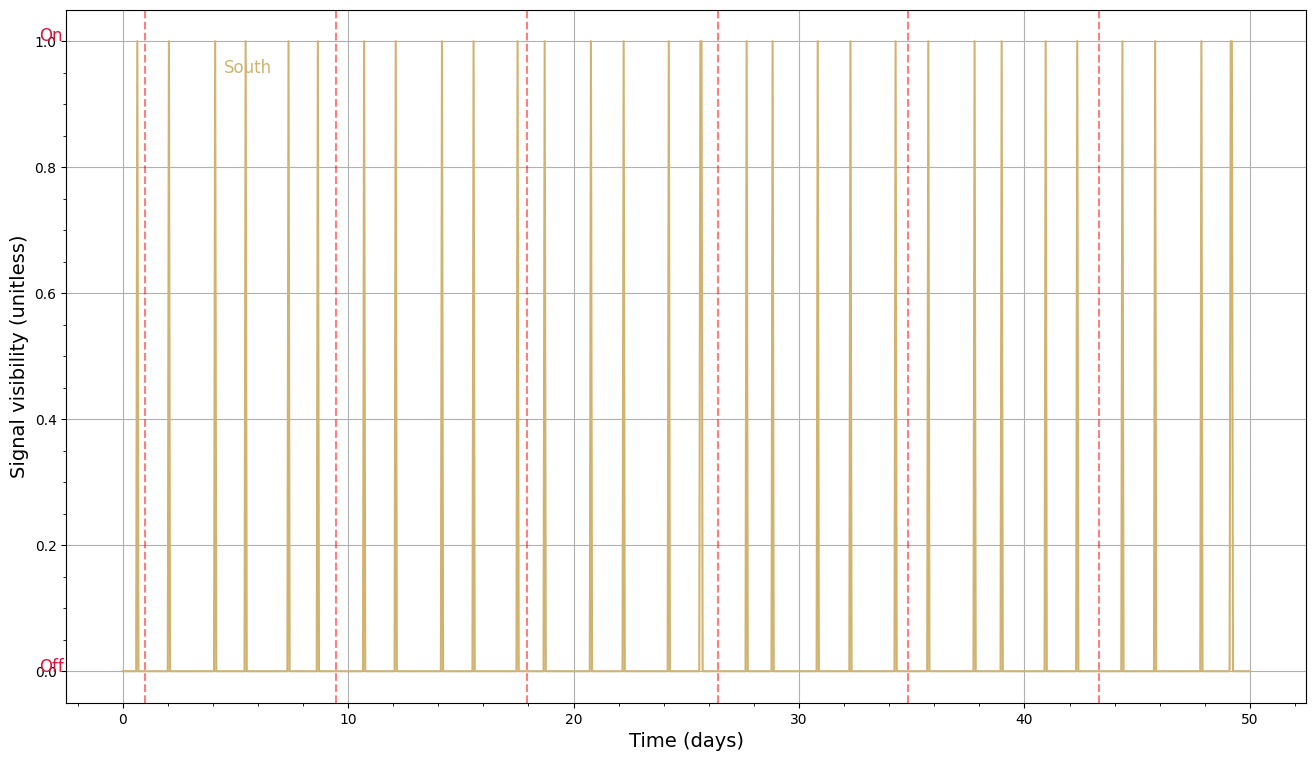

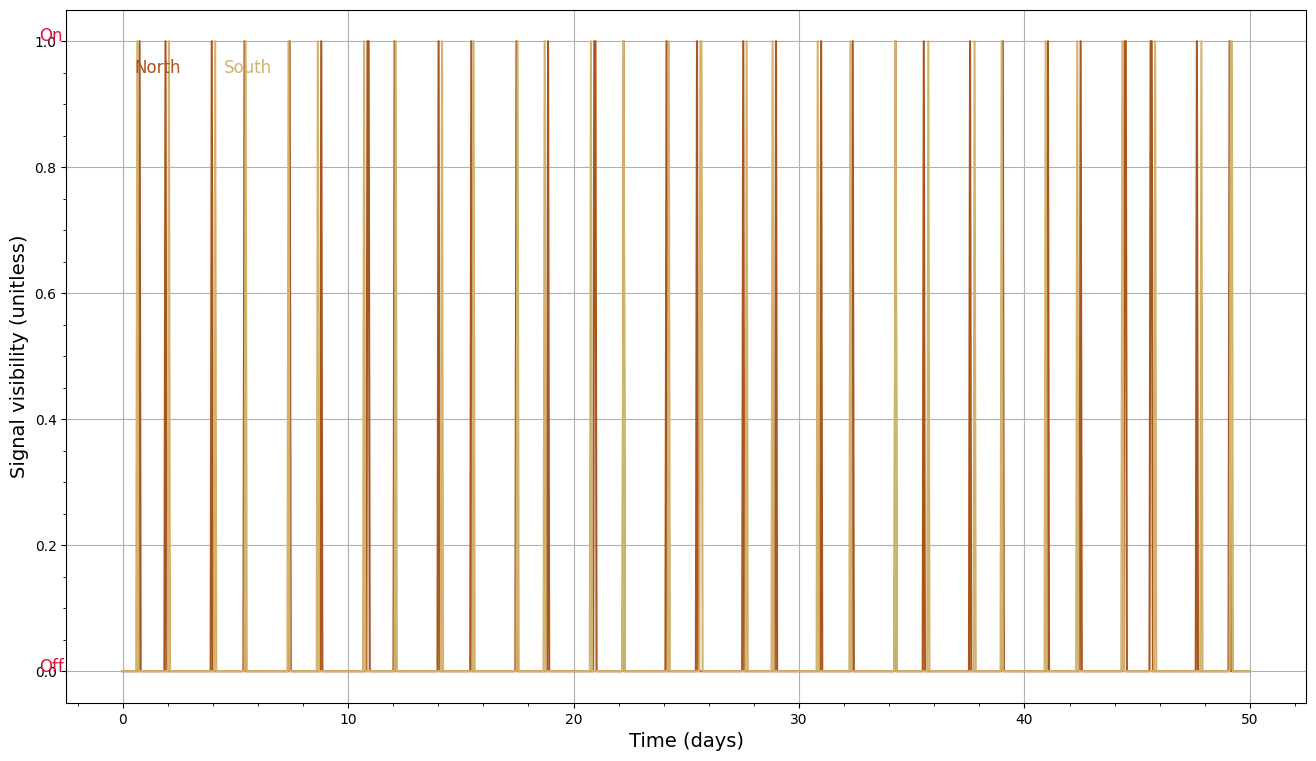

In [47]:
# Plotting results
fig = plt.figure(figsize=(16, 9))
plt.plot(times, vis_N, color = '#A9561E')
matplotlib.pyplot.text(-3.7, 1, 'On', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(-3.7, 0, 'Off', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(0.5, 0.95, 'North', fontdict=None, fontsize=12, color = '#A9561E')
for j in range(5):
    plt.axvline(P_p * j+1,color='r',linestyle='--',alpha=0.5 )
    plt.axvline(P_s * j+1,color='b',linestyle='--',alpha=0.5 )


plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Signal visibility (unitless)', fontsize=14)
plt.minorticks_on()
plt.grid()
# plt.xlim(0,5)
plt.show()

fig = plt.figure(figsize=(16, 9))
plt.plot(times, vis_S, color = '#D1B26F')
matplotlib.pyplot.text(-3.7, 1, 'On', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(-3.7, 0, 'Off', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(4.5, 0.95, 'South', fontdict=None, fontsize=12, color = '#D1B26F')
for j in range(6):
    plt.axvline(P_p * j+1,color='r',linestyle='--',alpha=0.5 )

plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Signal visibility (unitless)', fontsize=14)
plt.minorticks_on()
plt.grid()
# plt.xlim(0,5)
plt.show()



# PLotting them together for fun
fig = plt.figure(figsize=(16, 9))
plt.plot(times, vis_N, color = '#A9561E')
plt.plot(times, vis_S, color = '#D1B26F')
matplotlib.pyplot.text(-3.7, 1, 'On', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(-3.7, 0, 'Off', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(0.5, 0.95, 'North', fontdict=None, fontsize=12, color = '#A9561E')
matplotlib.pyplot.text(4.5, 0.95, 'South', fontdict=None, fontsize=12, color = '#D1B26F')
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Signal visibility (unitless)', fontsize=14)
plt.minorticks_on()
plt.grid()
# plt.xlim(0,5)
plt.show()



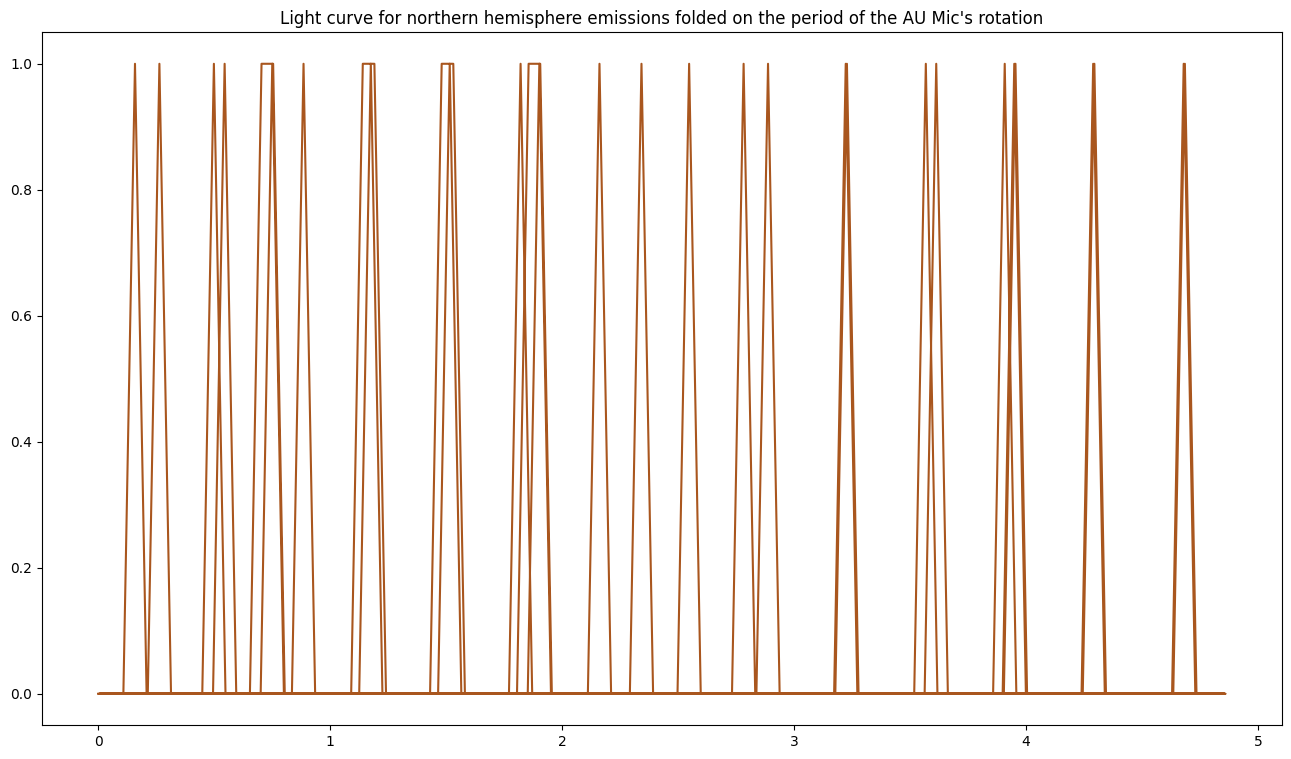

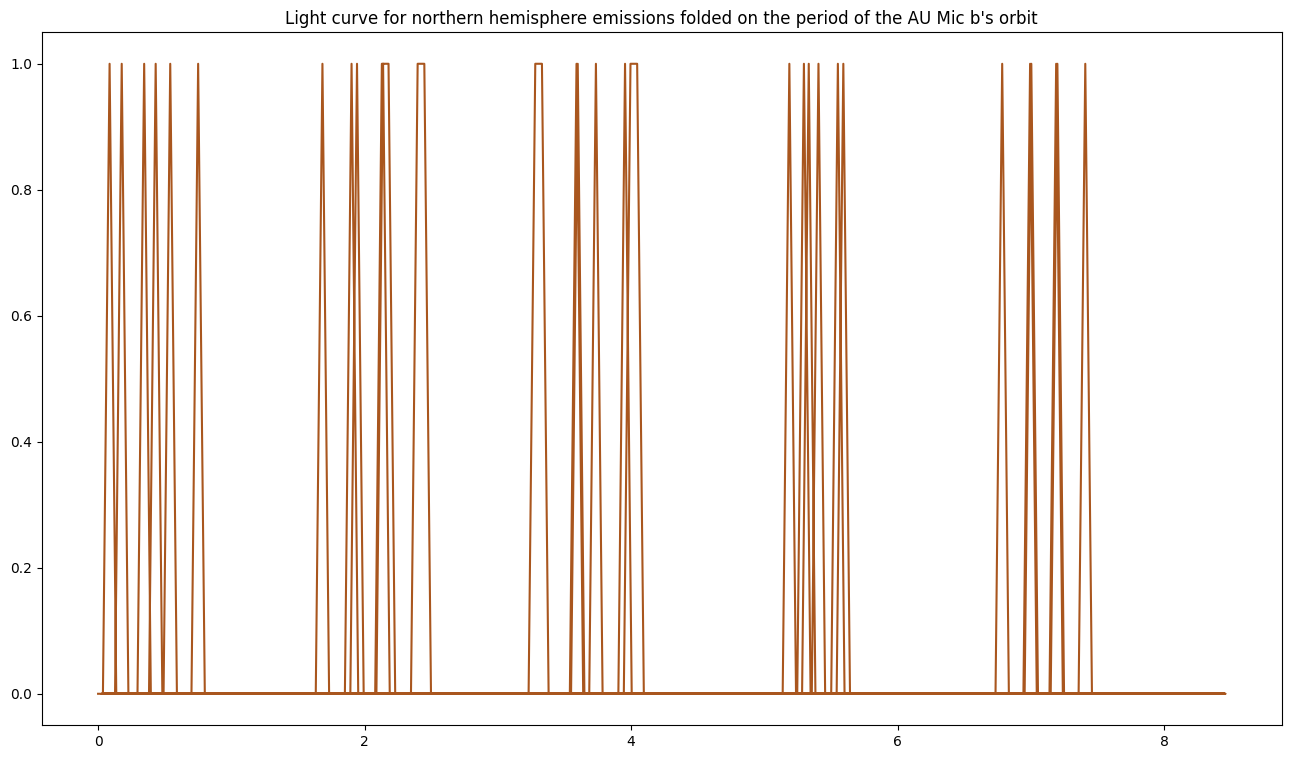

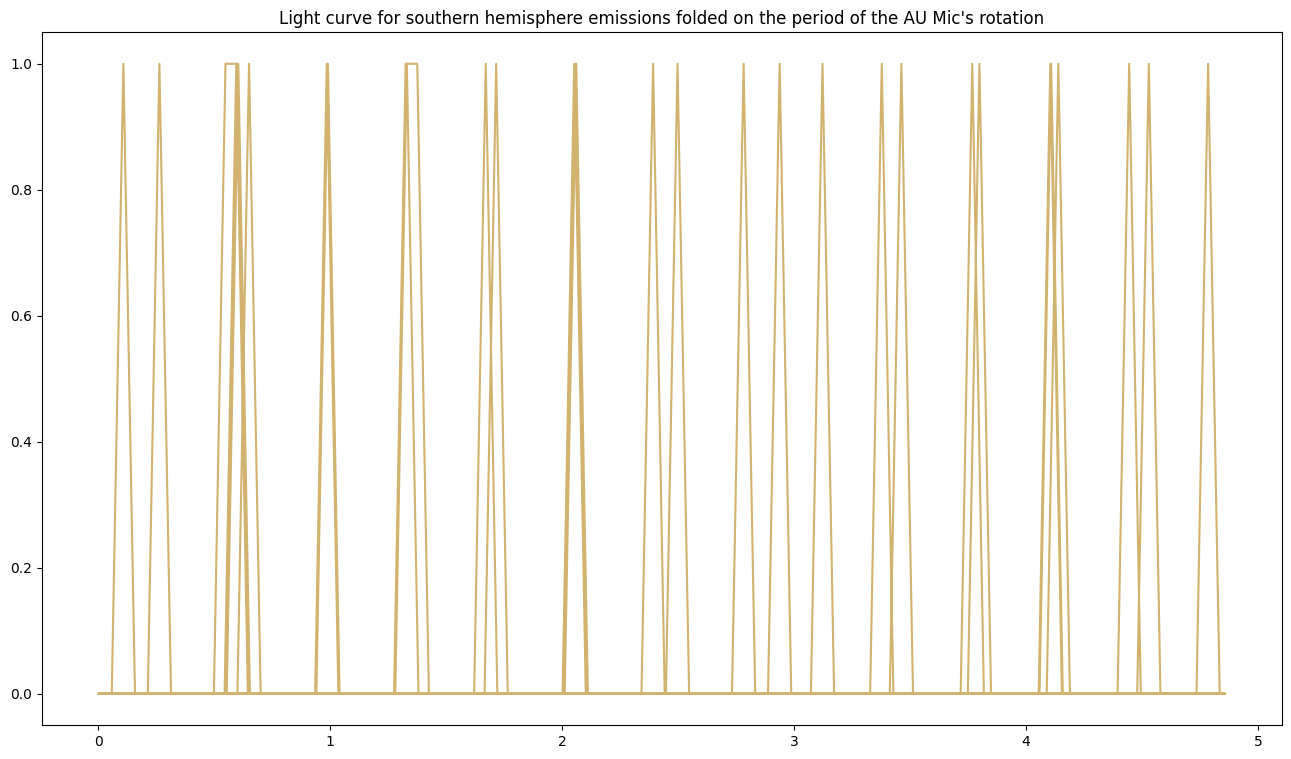

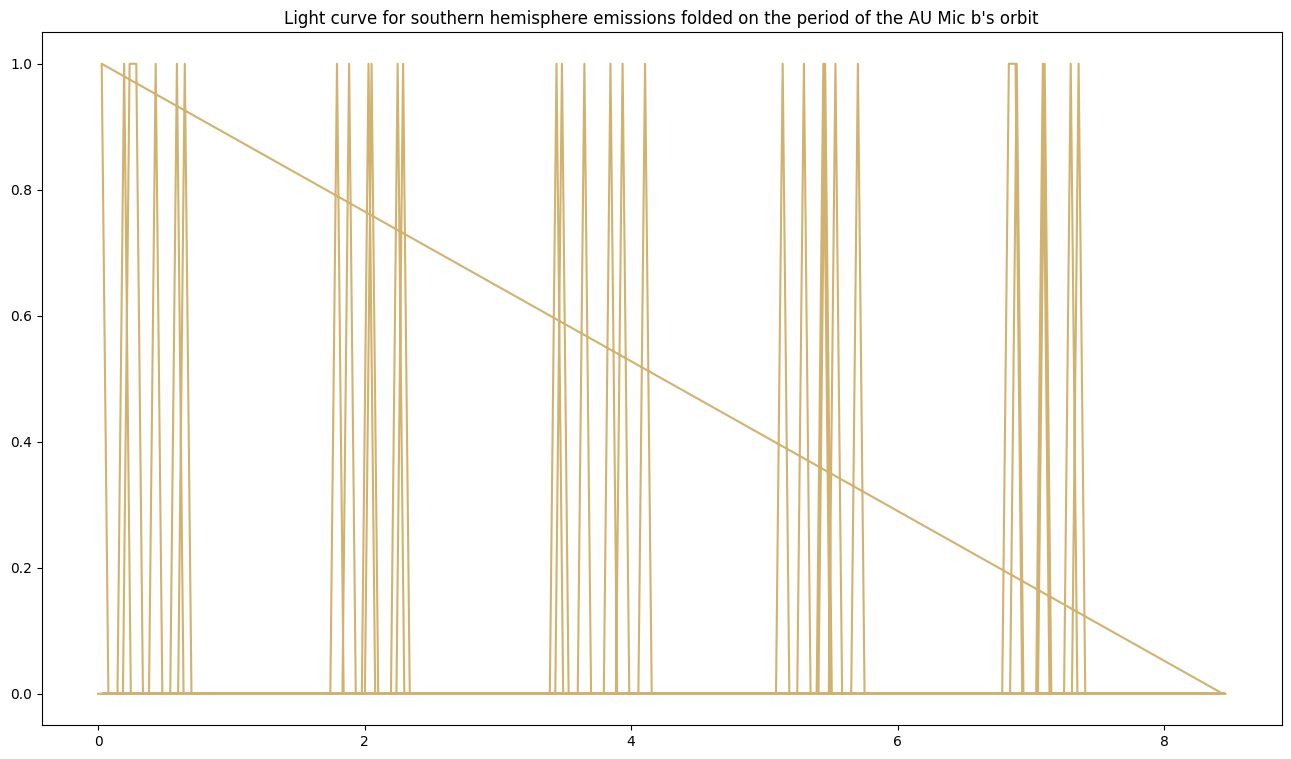

In [48]:
fig = plt.figure(figsize=(16, 9))
plt.plot(times % P_s, vis_N, color = '#A9561E')  # attempting to fold light curve for star period
plt.title("Light curve for northern hemisphere emissions folded on the period of the AU Mic's rotation")
plt.show()

fig = plt.figure(figsize=(16, 9))
plt.plot(times % P_p, vis_N, color = '#A9561E')  # attempting to fold light curve for star period
plt.title("Light curve for northern hemisphere emissions folded on the period of the AU Mic b's orbit")
plt.show()


fig = plt.figure(figsize=(16, 9))
plt.plot(times % P_s, vis_S, color = '#D1B26F')
plt.title("Light curve for southern hemisphere emissions folded on the period of the AU Mic's rotation")
plt.show()

fig = plt.figure(figsize=(16, 9))
plt.plot(times % P_p, vis_S, color = '#D1B26F')
plt.title("Light curve for southern hemisphere emissions folded on the period of the AU Mic b's orbit")
plt.show()

In [49]:
# finding index of when emissions are on and off

ups_N = np.where(vis_N > 0)[0]
downs_N = np.where(vis_N < 1)[0]

ups_S = np.where(vis_S > 0)[0]
downs_S = np.where(vis_S < 1)[0]



# calculating durations of emission in the northern hemisphere

durations_N = []
for ind in tqdm(ups_N):
    state_L = vis_N[ind-1]
    state_R = vis_N[ind+1]
    time_val_L = times[ind-1]
    time_val_R = times[ind+1]
    for i in range(1,10):
        if state_L == True:
            state_L = vis_N[ind-1-i]
            time_val_L = times[ind-1-i]
        else:
            state_L = state_L
            time_val_L = time_val_L
            break
    for i in range(1,10):
        if state_R == True:
              state_R = vis_N[ind+1+i]
              time_val_R = times[ind+1+i]
        else: 
            state_R = state_R
            time_val_R = time_val_R
            break
    dur = time_val_R - time_val_L
    durations_N.append(dur)

# there is an issue in that it stores two values for some emissions (in the case where there are consecutive indices for the one emission)
print(durations_N)

# calculating durations of emission in the southern hemisphere

durations_S = []
for ind in tqdm(ups_S):
    state_L = vis_S[ind-1]
    state_R = vis_S[ind+1]
    time_val_L = times[ind-1]
    time_val_R = times[ind+1]
    for i in range(1,10):
        if state_L == True:
            state_L = vis_S[ind-1-i]
            time_val_L = times[ind-1-i]
        else:
            state_L = state_L
            time_val_L = time_val_L
            break
    for i in range(1,10):
        if state_R == True:
              state_R = vis_S[ind+1+i]
              time_val_R = times[ind+1+i]
        else: 
            state_R = state_R
            time_val_R = time_val_R
            break
    dur = time_val_R - time_val_L
    durations_S.append(dur)

print(durations_S)

100%|██████████| 34/34 [00:00<00:00, 69125.71it/s]


[0.10010010010010006, 0.10010010010010029, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.1501501501501501, 0.1501501501501501, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.1501501501501501, 0.1501501501501501, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.15015015015015365, 0.15015015015015365, 0.15015015015014654, 0.15015015015014654, 0.10010010010010006, 0.10010010010010006]


100%|██████████| 32/32 [00:00<00:00, 118987.35it/s]

[0.10010010010010018, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010184, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.1501501501501501, 0.1501501501501501, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.10010010010010006, 0.15015015015015365, 0.15015015015015365]


In [ ]:







# CALCULATE TIME DIFFERENCE BETWEEN EMISSIONS!







In [70]:
help(ss.RotationModel.acf_rotation)

Help on function acf_rotation in module starspot.starspot:

acf_rotation(self, interval, smooth=9, cutoff=0, window_length=99, polyorder=3)
    Calculate a rotation period based on an autocorrelation function.
    
    Args:
        interval (float): The time in days between observations. For
            Kepler/K2 long cadence this is 0.02043365, for Tess its about
            0.00138889 days. Use interval = "TESS" or "Kepler" for these.
        smooth (Optional[float]): The smoothing window in days.
        cutoff (Optional[float]): The number of days to cut off at the
            beginning.
        window_length (Optional[float]): The filter window length.
        polyorder (Optional[float]): The polynomial order of the filter.
    
    Returns:
        acf_period (float): The ACF rotation period in days.



In [50]:
# Converting true and false values from maser into 1 and 0 for use in starspot acf code

visibility_North = []
visibility_South = []
for ind, val in enumerate(vis_N):
    if val == True and vis_S[ind] == True:
        visn = 1
        viss = 1
        visibility_North.append(visn)
        visibility_South.append(viss)
    elif val == True and vis_S[ind] == False:
        visn = 1
        viss = 0
        visibility_North.append(visn)
        visibility_South.append(viss)
    elif val == False and vis_S[ind] == True:
        visn = 0
        viss = 1
        visibility_North.append(visn)
        visibility_South.append(viss)
    elif val == False and vis_S[ind] == False:
        visn = 0
        viss = 0
        visibility_North.append(visn)
        visibility_South.append(viss)



Best periods - N:9.56, S:3.95


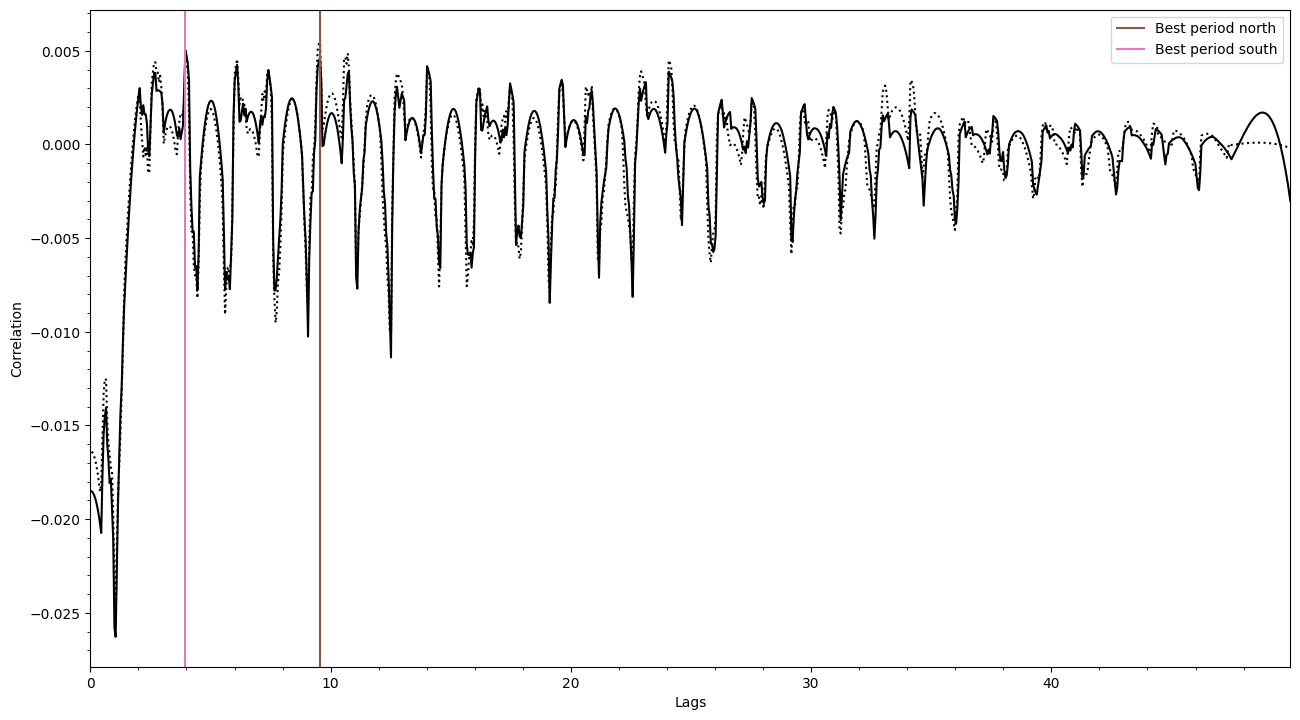

In [51]:
# Running the starspot code

times = np.linspace(0, 50, 1000)

rotate_N = ss.RotationModel(times, visibility_North, None)
rotate_S = ss.RotationModel(times, visibility_South, None)
acf_period_N = rotate_N.acf_rotation(interval=np.diff(times)[0])
acf_period_S = rotate_S.acf_rotation(interval=np.diff(times)[0])

print(f'Best periods - N:{acf_period_N:.2f}, S:{acf_period_S:.2f}')


fig = plt.figure(figsize=(16, 9))
plt.plot(rotate_N.lags, rotate_N.acf, ':', color='k')
plt.plot(rotate_S.lags, rotate_S.acf, color='k')
plt.axvline(rotate_N.acf_period, color="C5", label='Best period north')
plt.axvline(rotate_S.acf_period, color="C6", label='Best period south')
plt.xlabel("Lags")
plt.ylabel("Correlation")
plt.xlim(0, max(rotate_N.lags))
plt.legend()
plt.minorticks_on()
plt.subplots_adjust(left=.15, bottom=.15)
plt.show()

In [54]:
def period(M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval):
   north_vis, south_vis = ms.maser(M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)

   visibility_North = []
   visibility_South = []
   for ind, val in enumerate(north_vis):
      if val == True and south_vis[ind] == True:
         visn = 1
         viss = 1
         visibility_North.append(visn)
         visibility_South.append(viss)
      elif val == True and south_vis[ind] == False:
         visn = 1
         viss = 0
         visibility_North.append(visn)
         visibility_South.append(viss)
      elif val == False and south_vis[ind] == True:
         visn = 0
         viss = 1
         visibility_North.append(visn)
         visibility_South.append(viss)
      elif val == False and south_vis[ind] == False:
         visn = 0
         viss = 0
         visibility_North.append(visn)
         visibility_South.append(viss)

   if np.count_nonzero(visibility_North) > 0:
      rotate_N = ss.RotationModel(times, visibility_North, None)
      north_acf = ss.simple_acf(times, north_vis, interval)
      acf_period_N = rotate_N.acf_rotation(interval=interval)
   else:
      acf_period_N = np.nan

   if np.count_nonzero(visibility_South) > 0:
      rotate_S = ss.RotationModel(times, visibility_South, None)
      south_acf = ss.simple_acf(times, south_vis, interval)
      acf_period_S = rotate_S.acf_rotation(interval=interval)
   else:
      acf_period_S = np.nan


   #if np.allclose(visibility_North,0.):
   #   acf_period_N = np.nan
      
   #if np.allclose(visibility_South,0.):
   #   acf_period_S = np.nan
      

   return acf_period_N, acf_period_S


In [55]:
M_s = 0.5 # Star mass (solar masses) #### REFERENCE (PAPER 6 on one note) #####
R_s = 0.75 # Star radius (solar radii) ####  REFERENCE (PAPER 6 on one note) ####
P_s = 4.86 # Star rotation period (days) ####  REFERENCE (PAPER 6 on one note) ####
i_s = 90 # Star inclination of the rotation axis relative to the line of sight (degrees) ####  ACCORDING TO MEETING WITH BEN ####
B_s = 430 # Star dipole field strength at the magnetic poles (Gauss) #### https://arxiv.org/pdf/2304.09642.pdf #### 
beta = 20 # Star magnetic obliquity (degrees) #### ACCORDING TO MEETING WITH BEN ####
phi_s0 = 0.2 # Star rotation phase at times = 0 (0 – 1) <<<<<< LEFT AS IS
a = 10 # Planet orbital distance (stellar radii) #### REFERENCE (PAPER 6 on one note) ####
i_p = 89.18 # Planet inclination of the orbital axis relative to the line of sight (degrees) #### REFERENCE (PAPER 7 on one note) #### 
lam = 0 # Planet projected spin-orbit angle (degrees) #### ranging from -15 to 18 degrees 
#REFERENCE Spin-orbit alignment and magnetic activity in the young planetary system AU Mic⋆ ####
P_p = 8.4630351 # AU Mic b period in days
phi_p0 = 0.6 # Planet orbital phase at times = 0 (0 – 1) <<<<< LEFT AS IS
f = 10 # Emission observing frequency (MHz) #### - MAY INCREASE TO 3 GHz REFERENCE (PAPER 6 on one note) ####
alpha = 75 # Emission cone opening angle (degrees) <<<<< LEFT THESE AS IS - BASED ON KAVANAGH 2023
dalpha = 5 # Emission cone thickness (degrees) <<<<< LEFT THESE AS IS - BASED ON KAVANAGH 2023


times = np.linspace(0, 50, 1000)
interval = np.diff(times)[0]

betas = np.linspace(beta*0.5, beta*2, 50)
inclinations = np.linspace(i_s*0.5, i_s*2 ,5)


#fig, axes = plt.subplots(1, 5, sharey=True, figsize=(12.0,10.0))

#for j, b in (enumerate(tqdm(betas))):
#    for k, inc in enumerate(inclinations):
#        north, south = ms.maser(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)
#        ax = axes[j,k]
#        ax.plot(times, north, color = '#A9561E')
#
#        ax.plot(times, south, color = '#D1B26F')

#fig.tight_layout()
#fig.text(-0.02, 0.5, 'Period (days)', va='center', rotation='vertical', fontsize=12)

#plt.show()    

period_grid = np.zeros((len(betas), len(inclinations),2))
for j, b in (enumerate(tqdm(betas))):
    for k, inc in enumerate(inclinations):
        period_N = period(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval)[0]
        period_S = period(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval)[1]
        period_grid[j, k, :] = period_N, period_S

100%|██████████| 50/50 [01:34<00:00,  1.88s/it]


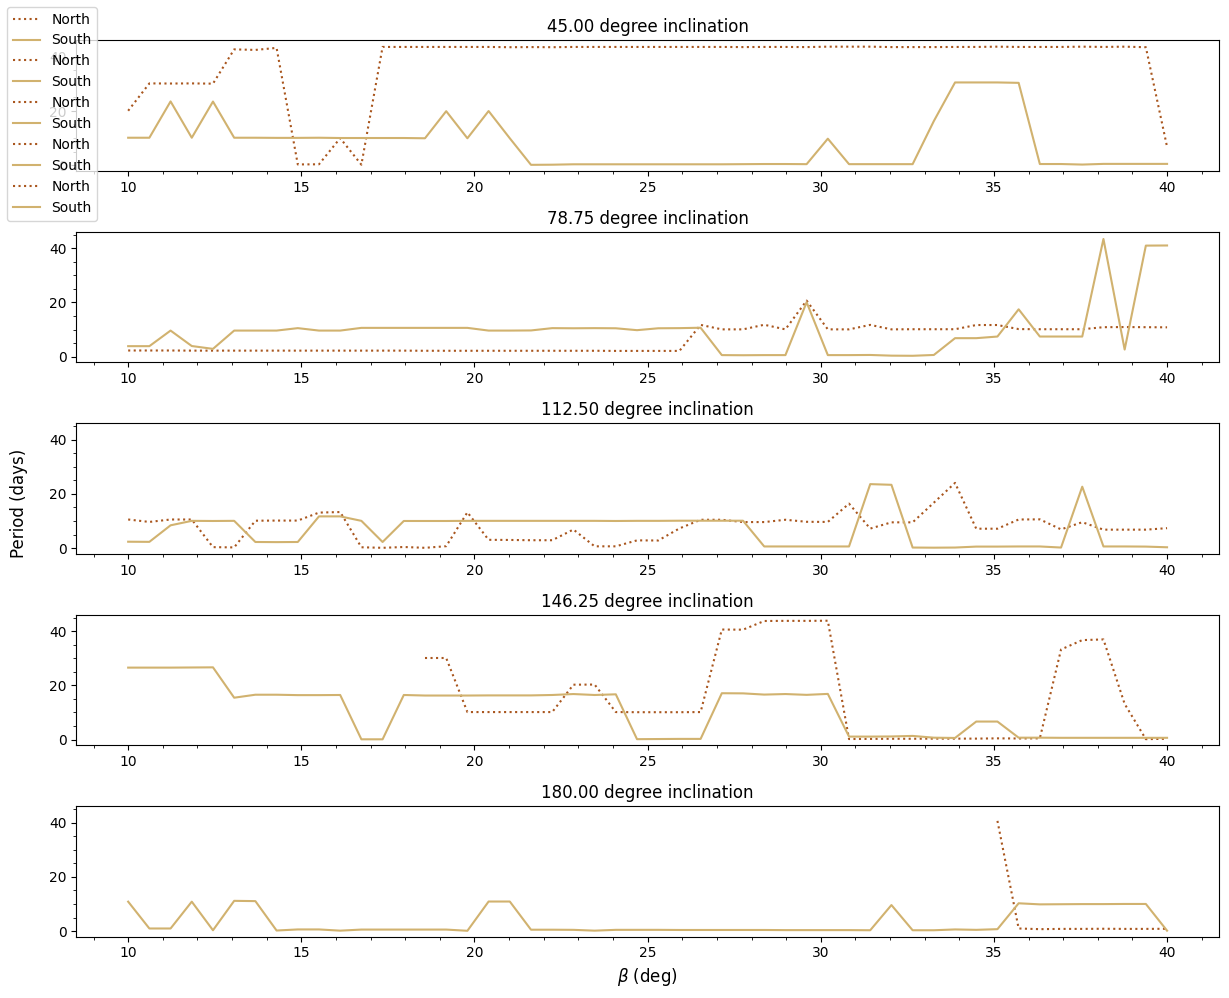

In [56]:
fig, axes = plt.subplots(5, 1, sharey=True, figsize=(12.0,10.0))

inc = ['45.00 degree inclination', '78.75 degree inclination', '112.50 degree inclination', '146.25 degree inclination', '180.00 degree inclination']
for j in range(5):
    ax = axes[j]
    axes[j].title.set_text(inc[j])
    ax.plot(betas,period_grid[:,j,0], ':', color = '#A9561E',label='North')
    ax.plot(betas,period_grid[:,j,1], color = '#D1B26F',label='South')
    
    plt.xlabel(r'$\beta$ (deg)', fontsize=12)
    ax.minorticks_on()
    
    #plt.ylabel('Period (d)')
    #ax.grid()
fig.tight_layout()
fig.legend(loc='upper left')
fig.text(-0.02, 0.5, 'Period (days)', va='center', rotation='vertical', fontsize=12)

plt.show()